In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")

In [3]:
# checking data types for variables in HousePrice dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# Checking data size
data.shape

(1460, 81)

In [5]:
# dataframe with categorical features
data.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [6]:
# dataframe with numerical features
data.describe(include=['int64'])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
target = data['SalePrice']
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

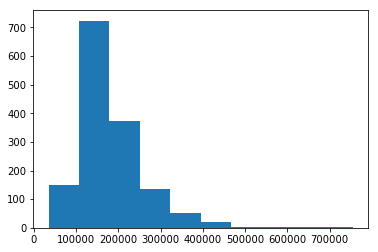

In [8]:
plt.hist(target)

In [9]:
target_log  = np.log(target)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000094E8F60>,
      dtype=object)

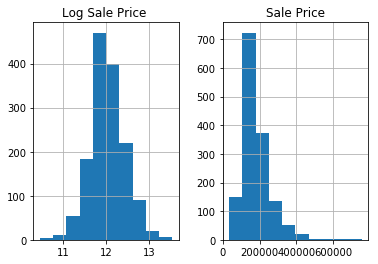

In [10]:
prices = pd.DataFrame({"Sale Price":data["SalePrice"],"Log Sale Price ":target_log})
prices.hist()

In [11]:
data = data.drop(["SalePrice"], axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [12]:
#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].astype(str)

#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [13]:
# save all categorical columns in list
categorical_columns = []

for col in data.columns.values:
    if data[col].dtype == "object":
        categorical_columns.append(col)

In [14]:
# dataframe with categorical features
data_cat = data[categorical_columns]
# dataframe with numerical features
data_num = data.drop(categorical_columns, axis=1)

In [15]:
# Using describe function in numeric dataframe 
data_num.describe()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,421.610009,24.284752,9981.264932,1.382997,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,1.000000,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,59.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,730.500000,69.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1095.250000,80.000000,11601.500000,7.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1460.000000,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [16]:
# Printing 5 head observation in categorical dataframe
data_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


In [17]:
data_num = ((data_num - data_num.mean())/(np.sqrt(data_num.var())))
data_num.describe()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1.460000e+03,1.201000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.452000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.379000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,1.140640e-17,-2.807450e-16,-7.585257e-17,2.644764e-16,1.061442e-15,4.505985e-15,-8.303734e-17,-1.961901e-17,-1.657730e-16,-8.935014e-17,...,4.071596e-15,-1.825024e-18,1.596896e-18,1.539104e-16,9.022463e-17,1.649366e-16,4.386141e-16,-7.969272e-17,-6.183600e-16,-1.173529e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.730272e+00,-2.019784e+00,-9.234128e-01,-3.687150e+00,-3.286697e+00,-1.688790e+00,-5.726373e-01,-9.726849e-01,-2.885540e-01,-1.283736e+00,...,-3.179710e+00,-2.364630e+00,-2.212205e+00,-7.519182e-01,-7.042419e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02
25%,-8.651360e-01,-4.550163e-01,-2.968890e-01,-7.948791e-01,-5.717268e-01,-8.653621e-01,-5.726373e-01,-9.726849e-01,-2.885540e-01,-7.790590e-01,...,-7.090465e-01,-1.026506e+00,-6.476941e-01,-7.519182e-01,-7.042419e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02
50%,0.000000e+00,-4.323529e-02,-1.040277e-01,-7.181151e-02,5.735183e-02,4.424348e-01,-5.726373e-01,-1.318570e-01,-2.885540e-01,-2.030937e-01,...,6.050436e-02,3.116179e-01,3.283304e-02,-7.519182e-01,-3.269178e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02
75%,8.651360e-01,4.097238e-01,1.086708e-01,6.512561e-01,9.513056e-01,9.268040e-01,3.441544e-01,5.889309e-01,-2.885540e-01,5.448690e-01,...,9.515633e-01,3.116179e-01,4.818406e-01,5.884489e-01,3.220798e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02
max,1.730272e+00,1.000422e+01,2.051125e+01,2.820459e+00,1.282400e+00,1.217426e+00,8.263909e+00,1.140185e+01,8.848606e+00,4.002923e+00,...,1.275585e+00,2.987865e+00,4.420012e+00,6.085550e+00,7.551611e+00,8.672338e+00,1.721134e+01,8.338605e+00,1.829991e+01,3.115459e+01


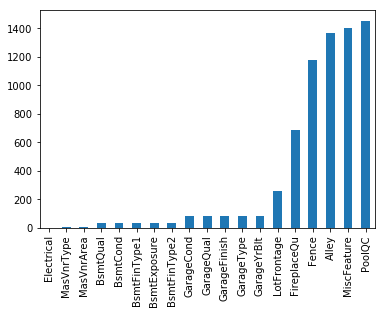

In [18]:
# first we'll visualize null count in overall dataframe
null_in_HousePrice = data.isnull().sum()
null_in_HousePrice = null_in_HousePrice[null_in_HousePrice > 0]
null_in_HousePrice.sort_values(inplace=True)
null_in_HousePrice.plot.bar()

In [19]:
# Printing total numbers and percentage of missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [20]:
data_len = data_num.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 260:
        #print("droping column: {}".format(col))
        data_num = data_num.drop(col, axis = 1)
    # if there is less than 260 missing values than fill in with median valu of column
    else:
        #print("filling missing values with median in column: {}".format(col))
        data_num = data_num.fillna(data_num[col].median())

In [21]:
data_len = data_cat.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_cat.columns.values:
    missing_values = data_cat[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 50:
        print("droping column: {}".format(col))
        data_cat.drop(col, axis = 1)
    # if there is less than 50 missing values than fill in with median valu of column
    else:
        #print("filling missing values with XXX: {}".format(col))
        #data_cat = data_cat.fillna('XXX')
        pass

droping column: Alley
droping column: FireplaceQu
droping column: GarageType
droping column: GarageFinish
droping column: GarageQual
droping column: GarageCond
droping column: PoolQC
droping column: Fence
droping column: MiscFeature


In [22]:
data_cat.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,...,1379,1379,1460,7,281,54,1460,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,...,5,5,3,3,4,4,12,5,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,Gd,MnPrv,Shed,6,2009,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,...,1311,1326,1340,3,157,49,253,338,1267,1198


In [23]:
data_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [24]:
# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [25]:
print("Numerical features : " + str(len(data_num.columns)))
print("Categorical features : " + str(len(data_cat_dummies.columns)))

Numerical features : 33
Categorical features : 246


In [26]:
# using concat function we merging two dataframe for furthere analysis
newdata = pd.concat([data_num, data_cat_dummies], axis=1)

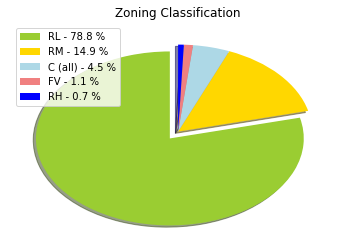

In [27]:
raw_data = pd.read_csv("train.csv")
labels = raw_data["MSZoning"].unique()
sizes = raw_data["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
percent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, percent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()

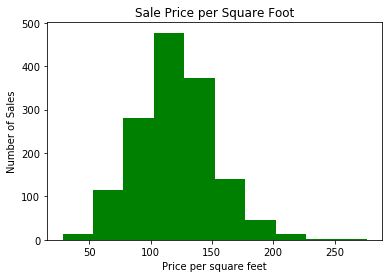

In [28]:
# SalePrice per Square Foot
SalePriceSF = raw_data['SalePrice']/raw_data['GrLivArea']
plt.hist(SalePriceSF, color="green")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

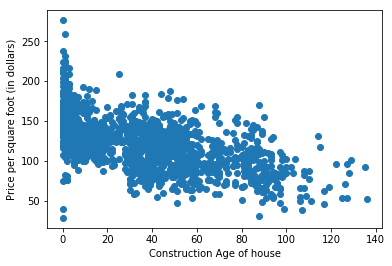

In [29]:
ConstructionAge = raw_data['YrSold'] - raw_data['YearBuilt']
plt.scatter(ConstructionAge, SalePriceSF)
plt.ylabel('Price per square foot (in dollars)')
plt.xlabel("Construction Age of house");

In [30]:
# Check Correlation
data_num.corr()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
Id,1.000000,-0.009601,-0.033226,-0.028365,-0.012713,-0.021998,-0.050199,-0.005024,-0.005968,-0.007940,...,0.000070,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242
LotFrontage,-0.009601,1.000000,0.306795,0.234196,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,...,0.064324,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168
LotArea,-0.033226,0.306795,1.000000,0.105806,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,...,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068
OverallQual,-0.028365,0.234196,0.105806,1.000000,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,...,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406
YearBuilt,-0.012713,0.117598,0.014228,0.572323,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,...,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383
YearRemodAdd,-0.021998,0.082746,0.013788,0.550684,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,...,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286
MasVnrArea,-0.050199,0.179283,0.103960,0.410238,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,...,0.249367,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815
BsmtFinSF1,-0.005024,0.215828,0.214103,0.239666,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,...,0.150338,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571
BsmtFinSF2,-0.005968,0.043340,0.111170,-0.059119,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,-0.209294,...,-0.087126,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940
BsmtUnfSF,-0.007940,0.122156,-0.002618,0.308159,0.149040,0.181133,0.114184,-0.495251,-0.209294,1.000000,...,0.186098,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837


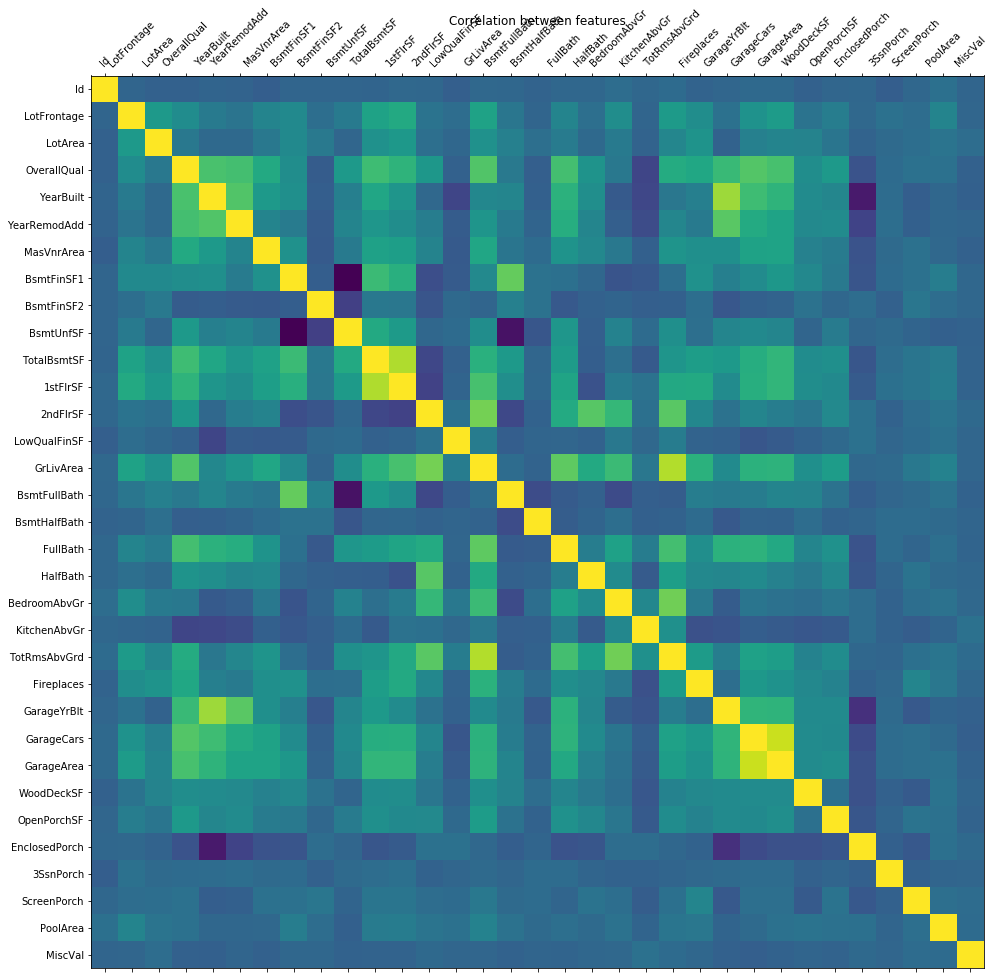

In [31]:
corr=data_num.corr()
plt.rcParams['figure.figsize'] = (30, 30)
plt.matshow(corr)
plt.title('Correlation between features')
plt.xticks(range(len(corr.columns)), corr.columns,rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [32]:
#Let us now split the dataset into train & test
from sklearn.cross_validation import train_test_split
x_train1,x_test1, y_train1, y_test1 = train_test_split(newdata, target_log, test_size = 0.30, random_state=0)
print("x_train1 ",x_train1.shape)
print("x_test1 ",x_test1.shape)
print("y_train1 ",y_train1.shape)
print("y_test1 ",y_test1.shape)

x_train1  (1022, 279)
x_test1  (438, 279)
y_train1  (1022,)
y_test1  (438,)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 
model1 = sm.OLS(y_train1, x_train1).fit()
# Note the Swap of X and Y 

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [34]:
# Printing Linear Regression Summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     66.98
Date:                Sat, 25 May 2019   Prob (F-statistic):               0.00
Time:                        23:39:56   Log-Likelihood:                 1115.4
No. Observations:                1022   AIC:                            -1699.
Df Residuals:                     756   BIC:                            -387.5
Df Model:                         265                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Id                       -0.0073      0.003     -2.124      0.034      -0.014      -0.001
LotFrontage               0.0166      0.006      2.889      0.004       0.005       0.028
LotArea                   0.0349      0.006      6.061      0.000       0.024       0.046
OverallQual               0.0480      0.008      6.299      0.000       0.033       0.063
YearBuilt                 0.0507      0.014      3.578      0.000       0.023       0.079
YearRemodAdd              0.0151      0.006      2.360      0.019       0.003       0.028
MasVnrArea                0.0049      0.005      0.924      0.356      -0.006       0.015
BsmtFinSF1                0.0234      0.005      4.290      0.000       0.013       0.034
BsmtFinSF2                0.0080      0.006      1.300      0.194      -0.004       0.020
BsmtUnfSF                 0.0038      0.005      0.813      0.416      -0.005       0.013
TotalBsmtSF               0.0311      0.007      4.413      0.000       0.017       0.045
1stFlrSF                  0.0450      0.009      5.052      0.000       0.027       0.062
2ndFlrSF                  0.0467      0.009      4.945      0.000       0.028       0.065
LowQualFinSF              0.0022      0.005      0.433      0.665      -0.008       0.012
GrLivArea                 0.0721      0.007     10.633      0.000       0.059       0.085
BsmtFullBath              0.0152      0.005      2.843      0.005       0.005       0.026
BsmtHalfBath              0.0067      0.004      1.679      0.094      -0.001       0.014
FullBath                  0.0180      0.007      2.745      0.006       0.005       0.031
HalfBath                  0.0196      0.006      3.319      0.001       0.008       0.031
BedroomAbvGr              0.0008      0.006      0.134      0.894      -0.011       0.013
KitchenAbvGr             -0.0114      0.007     -1.536      0.125      -0.026       0.003
TotRmsAbvGrd              0.0006      0.008      0.077      0.939      -0.015       0.017
Fireplaces                0.0039      0.008      0.506      0.613      -0.011       0.019
GarageYrBlt              -0.0017      0.008     -0.206      0.837      -0.018       0.015
GarageCars                0.0012      0.010      0.130      0.896      -0.017       0.020
GarageArea                0.0320      0.009      3.398      0.001       0.014       0.050
WoodDeckSF                0.0144      0.004      3.877      0.000       0.007       0.022
OpenPorchSF               0.0066      0.004      1.746      0.081      -0.001       0.014
EnclosedPorch             0.0035      0.004      0.859      0.391      -0.004       0.011
3SsnPorch                 0.0012      0.003      0.351      0.726      -0.006       0.008
ScreenPorch               0.0126      0.004      3.501      0.000       0.006       0.020
PoolArea               

In [35]:
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)
# Predicting the model on test data
predictions1 = model1.predict(x_test1)

In [36]:

tmp1 = pd.Series({'Model': " Base Linear Regression Model",
                 'R-Squared Value' : model1.rsquared,
                 'Adj.R-Squared Value': model1.rsquared_adj})

models_report = models_report.append(tmp1, ignore_index = True)
models_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.959145,0.944824,NaN


In [37]:
df_constant = sm.add_constant(newdata)

In [38]:
x_train2,x_test2, y_train2, y_test2 = train_test_split(df_constant, target_log, test_size = 0.30, random_state=0)

In [39]:
model2 = sm.OLS(y_train2, x_train2).fit()

In [40]:
# Printing Linear Regression Summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     66.98
Date:                Sat, 25 May 2019   Prob (F-statistic):               0.00
Time:                        23:39:57   Log-Likelihood:                 1115.4
No. Observations:                1022   AIC:                            -1699.
Df Residuals:                     756   BIC:                            -387.5
Df Model:                         265                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.9988      0.200     45.052      0.000       8.607       9.391
Id                       -0.0073      0.003     -2.124      0.034      -0.014      -0.001
LotFrontage               0.0166      0.006      2.889      0.004       0.005       0.028
LotArea                   0.0349      0.006      6.061      0.000       0.024       0.046
OverallQual               0.0480      0.008      6.299      0.000       0.033       0.063
YearBuilt                 0.0507      0.014      3.578      0.000       0.023       0.079
YearRemodAdd              0.0151      0.006      2.360      0.019       0.003       0.028
MasVnrArea                0.0049      0.005      0.924      0.356      -0.006       0.015
BsmtFinSF1                0.0234      0.005      4.290      0.000       0.013       0.034
BsmtFinSF2                0.0080      0.006      1.300      0.194      -0.004       0.020
BsmtUnfSF                 0.0038      0.005      0.813      0.416      -0.005       0.013
TotalBsmtSF               0.0311      0.007      4.413      0.000       0.017       0.045
1stFlrSF                  0.0450      0.009      5.052      0.000       0.027       0.062
2ndFlrSF                  0.0467      0.009      4.945      0.000       0.028       0.065
LowQualFinSF              0.0022      0.005      0.433      0.665      -0.008       0.012
GrLivArea                 0.0721      0.007     10.633      0.000       0.059       0.085
BsmtFullBath              0.0152      0.005      2.843      0.005       0.005       0.026
BsmtHalfBath              0.0067      0.004      1.679      0.094      -0.001       0.014
FullBath                  0.0180      0.007      2.745      0.006       0.005       0.031
HalfBath                  0.0196      0.006      3.319      0.001       0.008       0.031
BedroomAbvGr              0.0008      0.006      0.134      0.894      -0.011       0.013
KitchenAbvGr             -0.0114      0.007     -1.536      0.125      -0.026       0.003
TotRmsAbvGrd              0.0006      0.008      0.077      0.939      -0.015       0.017
Fireplaces                0.0039      0.008      0.506      0.613      -0.011       0.019
GarageYrBlt              -0.0017      0.008     -0.206      0.837      -0.018       0.015
GarageCars                0.0012      0.010      0.130      0.896      -0.017       0.020
GarageArea                0.0320      0.009      3.398      0.001       0.014       0.050
WoodDeckSF                0.0144      0.004      3.877      0.000       0.007       0.022
OpenPorchSF               0.0066      0.004      1.746      0.081      -0.001       0.014
EnclosedPorch             0.0035      0.004      0.859      0.391      -0.004       0.011
3SsnPorch                 0.0012      0.003      0.351      0.726      -0.006       0.008
ScreenPorch            

In [41]:
# Predicting the model on test data
predictions2 = model2.predict(x_test2)

tmp2 = pd.Series({'Model': " Linear Regression Model with Constant",
                 'R-Squared Value' : model2.rsquared,
                 'Adj.R-Squared Value': model2.rsquared_adj,
                 'RMSE': rmse(predictions2, y_test1)})

models_report = models_report.append(tmp2, ignore_index = True)
models_report

NameError: name 'rmse' is not defined

In [ ]:
print ("\nVariance Inflation Factor")
cnames = x_train1.columns
vif_5 = []
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train1[yvar],(x_train1[xvars])).fit()
    vif = 1/(1-mod.rsquared)
    print (yvar,round(vif,3))
    if vif>5:
        vif_5.append(yvar)

In [ ]:
to_keep = [x for x in x_train1 if x not in vif_5]
# print(to_keep)
x_train3 = x_train1[to_keep]
x_test3 = x_test2[to_keep]
x_train3.head()

In [ ]:
model3 = sm.OLS(y_train1,x_train3).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model3.summary()

In [ ]:
# Predicting the model on test data
predictions3 = model3.predict(x_test3)

tmp3 = pd.Series({'Model': " Linear Regression Model with Constant - VIF 5",
                 'R-Squared Value' : model3.rsquared,
                 'Adj.R-Squared Value': model3.rsquared_adj})

models_report = models_report.append(tmp3, ignore_index = True)
models_report

In [ ]:
X = x_train3
Y = y_train1

In [ ]:
def feature_selection(X, Y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(Y, sm.add_constant((X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [ ]:
result = feature_selection(X, Y)

print('resulting features:')
print(result)

In [ ]:
df_train= x_train2.filter(['OverallQual', 'LotFrontage', 'FullBath', 'BsmtFullBath', 'CentralAir_Y', 'HalfBath', 'Condition2_PosN', 'Neighborhood_Crawfor', 'LotConfig_CulDSac', 'WoodDeckSF', 'YearRemodAdd', 'Neighborhood_ClearCr', 'Exterior1st_BrkFace', 'ScreenPorch', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'OverallCond_3', 'MSSubClass_30', 'SaleType_WD', 'OverallCond_5', 'BsmtExposure_Gd', 'Neighborhood_StoneBr', 'Functional_Maj2', 'Exterior2nd_Wd Shng', 'FireplaceQu_Gd', 'Exterior1st_BrkComm', 'MSSubClass_160', 'Alley_Pave', 'OpenPorchSF', 'PavedDrive_Y', 'BedroomAbvGr', 'OverallCond_4', 'Heating_OthW', 'Neighborhood_Timber', 'SaleCondition_Normal', 'SaleType_ConLI', 'YrSold_2010', 'BsmtUnfSF', 'LotShape_IR2', 'GarageQual_Fa', 'Utilities_NoSeWa', 'BsmtHalfBath', 'OverallCond_8', 'SaleType_ConLw', 'Fence_MnPrv', 'Fence_GdWo', 'RoofMatl_WdShngl', 'HeatingQC_TA', 'Exterior2nd_Brk Cmn', 'RoofStyle_Gambrel'])
df_test= x_test2.filter(['OverallQual', 'LotFrontage', 'FullBath', 'BsmtFullBath', 'CentralAir_Y', 'HalfBath', 'Condition2_PosN', 'Neighborhood_Crawfor', 'LotConfig_CulDSac', 'WoodDeckSF', 'YearRemodAdd', 'Neighborhood_ClearCr', 'Exterior1st_BrkFace', 'ScreenPorch', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'OverallCond_3', 'MSSubClass_30', 'SaleType_WD', 'OverallCond_5', 'BsmtExposure_Gd', 'Neighborhood_StoneBr', 'Functional_Maj2', 'Exterior2nd_Wd Shng', 'FireplaceQu_Gd', 'Exterior1st_BrkComm', 'MSSubClass_160', 'Alley_Pave', 'OpenPorchSF', 'PavedDrive_Y', 'BedroomAbvGr', 'OverallCond_4', 'Heating_OthW', 'Neighborhood_Timber', 'SaleCondition_Normal', 'SaleType_ConLI', 'YrSold_2010', 'BsmtUnfSF', 'LotShape_IR2', 'GarageQual_Fa', 'Utilities_NoSeWa', 'BsmtHalfBath', 'OverallCond_8', 'SaleType_ConLw', 'Fence_MnPrv', 'Fence_GdWo', 'RoofMatl_WdShngl', 'HeatingQC_TA', 'Exterior2nd_Brk Cmn', 'RoofStyle_Gambrel'])

In [ ]:
# Building Linear Regression model using OLS 

model4 = sm.OLS(y_train1,df_train).fit()
# Note the Swap of X and Y 
model4.summary()

In [ ]:
# prediction on test data
predictions4  = model4.predict(df_test)

tmp4 = pd.Series({'Model': " LRM after removing Insignificant Variables",
                 'R-Squared Value' : model4.rsquared,
                 'Adj.R-Squared Value': model4.rsquared_adj})

models_report = models_report.append(tmp4, ignore_index = True)
models_report